# HOMEWORK 1
## II. Programming

### 1.

Best variable: Glucose
Worst Variable: BloodPressure


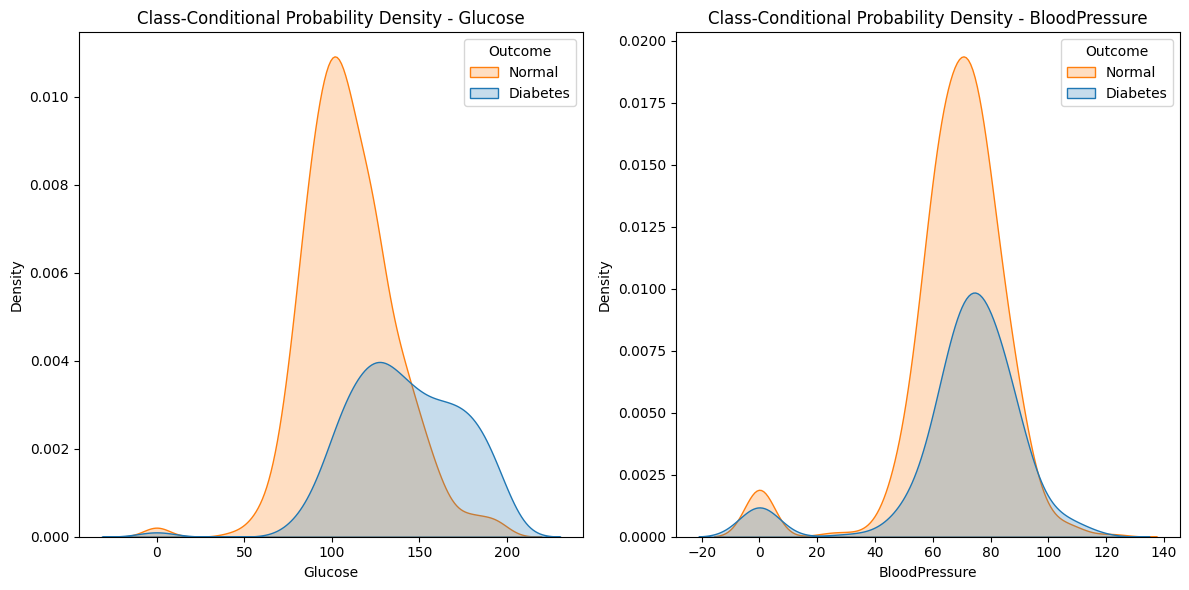

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

# load and prepare data
data, meta = loadarff('diabetes.arff')
df = pd.DataFrame(data)

X = df.iloc[:, :-1] #all variables except outcome
y = df['Outcome'].str.decode('utf-8') # target class

# ANOVA
f_values, p_values = f_classif(X, y)

results = pd.DataFrame({'Variable': X.columns, 'F-value': f_values, 'p-value': p_values})

best_variable = results.loc[results['F-value'].idxmax()]['Variable'] # retrieves the variable with the highest IG
worst_variable = results.loc[results['F-value'].idxmin()]['Variable'] # retrieves the variable with the lowest IG

print(f"Best variable: {best_variable}\nWorst Variable: {worst_variable}")

plt.figure(figsize=(12, 6))

# Best Variable
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x=best_variable, hue='Outcome', fill=True)
plt.title(f'Class-Conditional Probability Density - {best_variable}')
plt.legend(title='Outcome', labels=['Normal', 'Diabetes'])

# Worst Variable
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x=worst_variable, hue='Outcome', fill=True)
plt.title(f'Class-Conditional Probability Density - {worst_variable}')
plt.legend(title='Outcome', labels=['Normal', 'Diabetes'])

plt.tight_layout()
plt.show()

#print(df['BloodPressure'].describe())


### 2.

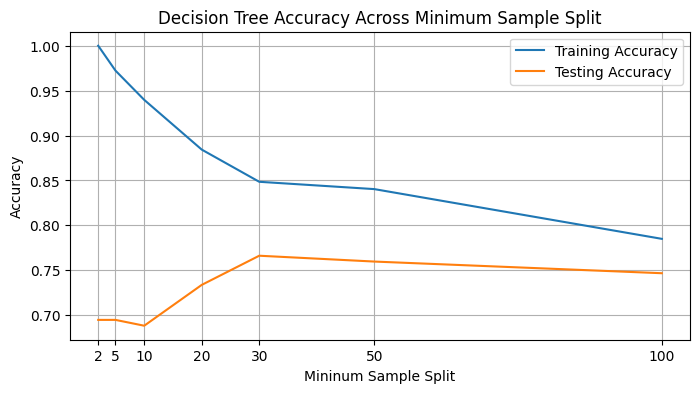

In [69]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# load and prepare data
data, meta = loadarff('diabetes.arff')
df = pd.DataFrame(data)

X = df.iloc[:, :-1] # all variables except outcome
y = df['Outcome'].str.decode('utf-8') # target class

# the minimum sample split
min_samples_split = [2, 5, 10, 20, 30, 50, 100]

# split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state = 1)

# function that evaluates
def evaluate_decision_tree(X_train, X_test, y_train, y_test, min_samples_splits, n_runs):
    training_accuracies = []
    testing_accuracies = []

    for min in min_samples_split:
        train_acc = []
        test_acc = []

        for x in range(n_runs):
            predictor = DecisionTreeClassifier(min_samples_split=min, random_state=1)
            predictor.fit(X_train, y_train)

            y_train_pred = predictor.predict(X_train)
            train_acc.append(accuracy_score(y_train, y_train_pred))

            y_test_pred = predictor.predict(X_test)
            test_acc.append(accuracy_score(y_test, y_test_pred))
    
        training_accuracies.append(np.average(train_acc))
        testing_accuracies.append(np.average(test_acc))

    return training_accuracies, testing_accuracies
    
training_accuracies, testing_accuracies = evaluate_decision_tree(X_train, X_test, y_train, y_test, min_samples_split, 10)

plt.figure(figsize=(8,4))
plt.plot(min_samples_split, training_accuracies, label ='Training Accuracy')
plt.plot(min_samples_split, testing_accuracies, label ='Testing Accuracy')
plt.title('Decision Tree Accuracy Across Minimum Sample Split')
plt.xlabel('Mininum Sample Split')
plt.ylabel('Accuracy')
plt.xticks(min_samples_split)
plt.legend()
plt.grid(True)
plt.show()


### 3.

olá

### 4.
#### i.

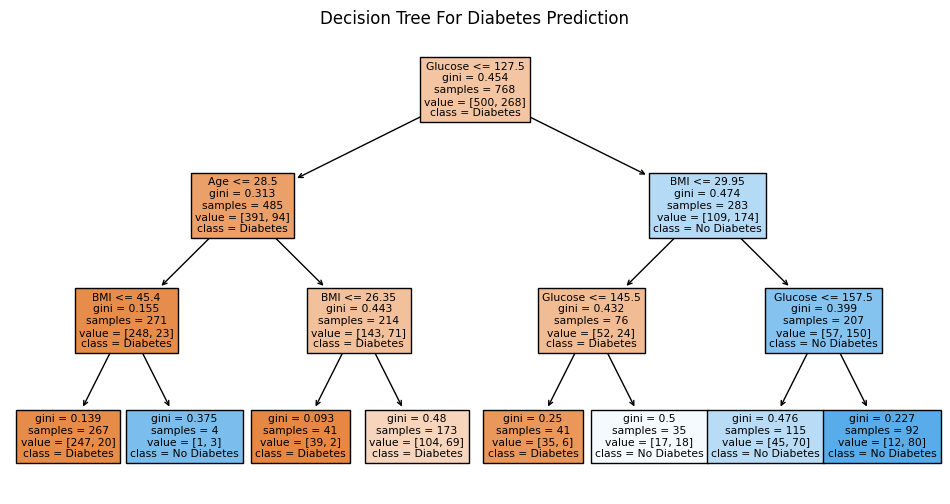

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# load and prepare data
data, meta = loadarff('diabetes.arff')
df = pd.DataFrame(data)

X = df.iloc[:, :-1] # all variables except outcome
y = df['Outcome'].str.decode('utf-8') # target class

predictor = DecisionTreeClassifier(max_depth=3, random_state=1)
predictor.fit(X, y)

plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, filled=True, feature_names=X.columns, class_names=["Diabetes", "No Diabetes"])
plt.title("Decision Tree For Diabetes Prediction")
plt.show()


##### ii.